# Main Simulation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyAdasi.sim_utils import GenderSystem, Chromo, Gender, generate_gender_func, apg, dist_inverse, generate_distribution_func

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
system = GenderSystem(False, Chromo.X, Chromo.Y, Chromo.O, extended=True)

determine_gender = generate_gender_func(system)
distribution_func = generate_distribution_func(system)

In [4]:
a = 0.9
b = 0.2

In [5]:
# a = 0.4
# b = 0.05

In [6]:
input_prob = np.array([[0.5], [0], [0.35], [0], [0.15], [0]])
results = input_prob[:, 0].copy()

curr = input_prob.copy()
prev = curr.copy()
curr = distribution_func(prev)
results = np.vstack((results, np.hstack(curr.T[0])))

for i in range(2, 51):
	aterm = distribution_func(curr)
	bterm = distribution_func(prev)
	cterm = dist_inverse(bterm)
	next = a * aterm + (1 - a) * b * bterm + (1 - a) * (1 - b) * cterm
	# next = a * aterm + (1 - a) * bterm
	# next = aterm
	prev = curr
	curr = next
	results = np.vstack((results, np.hstack(curr.T[0])))

In [7]:
gene_dists = pd.DataFrame(results, columns = apg)

In [8]:
gene_dists.tail(10)

,OO,OY,YY,YX,XX,OX
41,0.115542,0.148907,0.053732,0.212003,0.185688,0.284128
42,0.115071,0.148744,0.053850,0.212428,0.186077,0.283829
43,0.114646,0.148590,0.053949,0.212826,0.186430,0.283549
44,0.114257,0.148455,0.054049,0.213188,0.186755,0.283287
45,0.113905,0.148328,0.054130,0.213531,0.187054,0.283052
46,0.113579,0.148211,0.054212,0.213830,0.187334,0.282835
47,0.113281,0.148102,0.054284,0.214110,0.187587,0.282636
48,0.113009,0.148003,0.054347,0.214373,0.187813,0.282455
49,0.112765,0.147912,0.054411,0.214608,0.188021,0.282283
50,0.112539,0.147831,0.054474,0.214825,0.188211,0.282129


In [9]:
gene_dists['time'] = gene_dists.index

In [10]:
gene_melt = gene_dists.melt(['time'], value_name = 'probability', var_name = 'genome')
gene_melt['gender'] = [determine_gender(x) for x in gene_melt['genome']]

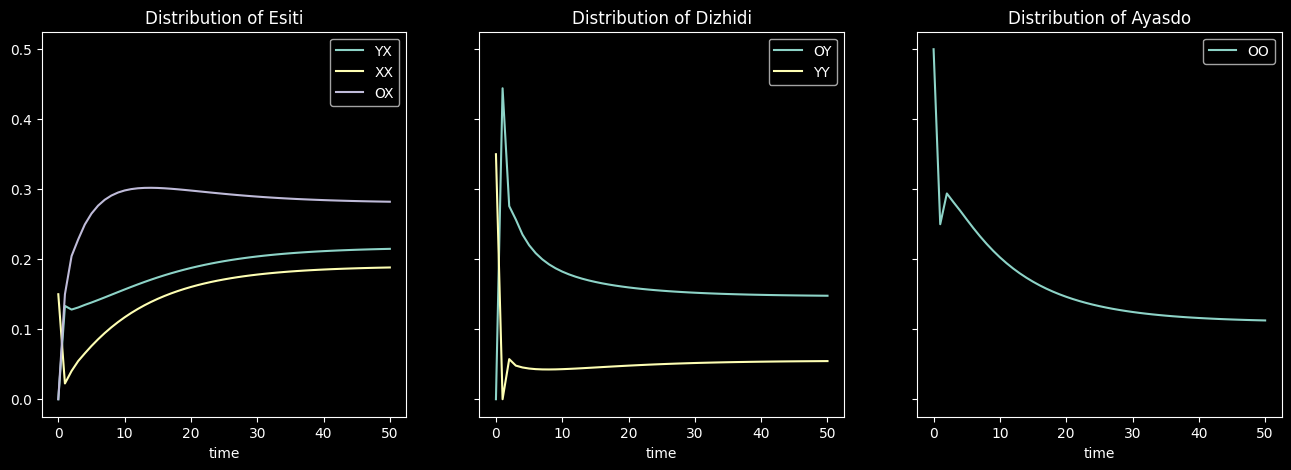

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (16, 5))
for gen in gene_melt['genome'].unique():
    if determine_gender(gen) == Gender.E:
        curax = ax1
    elif determine_gender(gen) == Gender.D:
        curax = ax2
    else:
        curax = ax3
    
    curax.plot(gene_melt[gene_melt['genome']==gen]['time'], gene_melt[gene_melt['genome']==gen]['probability'], label=gen)

ax1.set_xlabel("time")
ax2.set_xlabel("time")
ax3.set_xlabel("time")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax1.title.set_text("Distribution of Esiti")
ax2.title.set_text("Distribution of Dizhidi")
ax3.title.set_text("Distribution of Ayasdo")
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

In [12]:
gender_dists = gene_dists.copy()
gender_dists[Gender.D] = [0] * len(gene_dists)
gender_dists[Gender.E] = [0] * len(gene_dists)
gender_dists[Gender.A] = [0] * len(gene_dists)

for g in apg:
    gender_dists[determine_gender(g)] += gender_dists[g]
    
gender_dists = gender_dists.drop(apg, axis = 1)

In [13]:
gender_melt = gender_dists.melt(['time'], value_name = 'probability', var_name = 'gender')

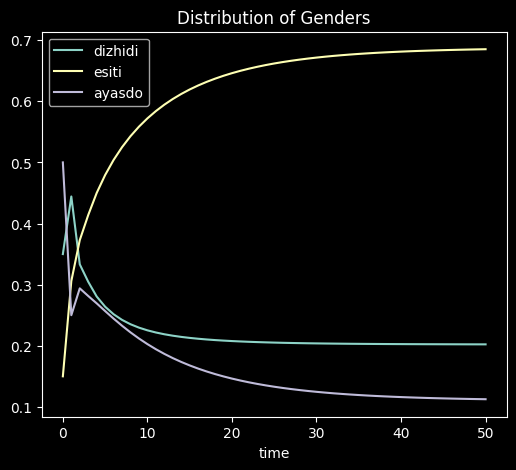

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))
for race in gender_melt['gender'].unique():
    ax.plot(gender_melt[gender_melt['gender']==race]['time'], gender_melt[gender_melt['gender']==race]['probability'], label=race)

ax.set_xlabel("time")
ax.title.set_text("Distribution of Genders")
ax.legend()
plt.show()

In [15]:
gene_dists.iloc[list(range(0, 51, 5))]

,OO,OY,YY,YX,XX,OX,time
0,0.500000,0.000000,0.350000,0.000000,0.150000,0.000000,0
5,0.256764,0.220064,0.043841,0.138152,0.076015,0.265164,5
10,0.202726,0.182321,0.042938,0.156790,0.117001,0.298225,10
15,0.167843,0.167511,0.045360,0.174032,0.143445,0.301819,15
20,0.146309,0.159723,0.047981,0.187514,0.160374,0.298106,20
25,0.132978,0.155066,0.050124,0.197245,0.171182,0.293415,25
30,0.124640,0.152144,0.051725,0.203973,0.178064,0.289445,30
35,0.119385,0.150281,0.052855,0.208521,0.182459,0.286506,35
40,0.116048,0.149097,0.053615,0.211533,0.185263,0.284453,40
45,0.113905,0.148328,0.054130,0.213531,0.187054,0.283052,45


In [16]:
gender_dists.iloc[list(range(0, 51, 5))]

,time,dizhidi,esiti,ayasdo
0,0,0.350000,0.150000,0.500000
5,5,0.263905,0.479331,0.256764
10,10,0.225258,0.572016,0.202726
15,15,0.212871,0.619295,0.167843
20,20,0.207705,0.645995,0.146309
25,25,0.205190,0.661841,0.132978
30,30,0.203869,0.671482,0.124640
35,35,0.203137,0.677487,0.119385
40,40,0.202712,0.681249,0.116048
45,45,0.202458,0.683637,0.113905
